# Laboratorio No 2
## 07140147 José Luis Hernández

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Nadam
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from sklearn.metrics import classification_report, mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
os.chdir('./drive/MyDrive/laboratorio2/')

In [4]:
os.listdir()

['.ipynb_checkpoints', 'supermarket_sales.csv']

In [5]:
data = pd.read_csv('supermarket_sales.csv')
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
def select_col_numerics(df):
    colnames = df.columns
    numeric_continues_vars = []
    for col in colnames:
        unique_values =len (df[col].unique())
        if((df[col].dtype != 'object') and (unique_values > 0)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars    

In [8]:
columnas_numericas = select_col_numerics(data)

In [9]:
def inspect_outliers(df, col1):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(131)
    sns.distplot(df[col1], bins=30)
    plt.title("Densisd-Histograma: " + col1)
    
    plt.subplot(132)
    stats.probplot(df[col1], dist="norm", plot=plt)
    plt.title("QQ-Plot: " + col1)
    
    plt.subplot(133)
    sns.boxplot(y=df[col1])
    plt.title("Boxplot: " + col1)
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


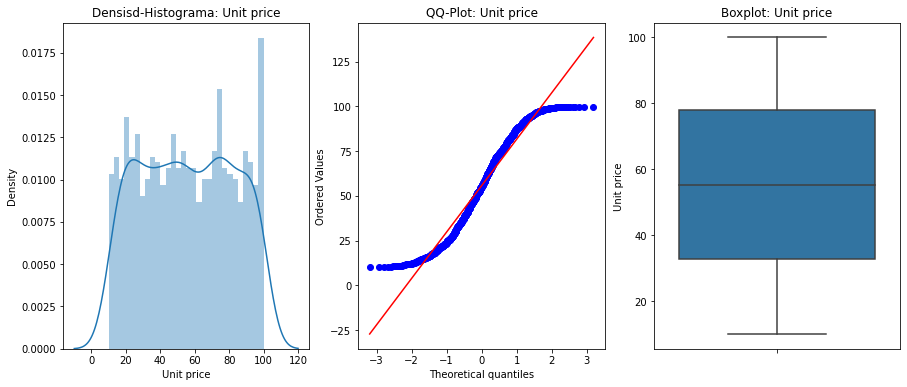

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


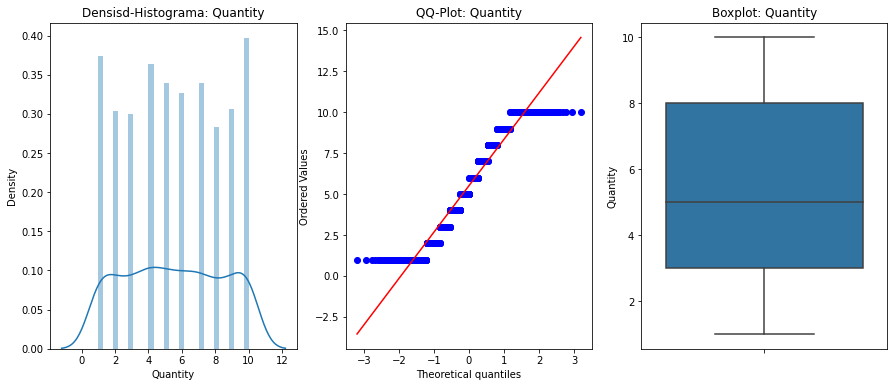

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


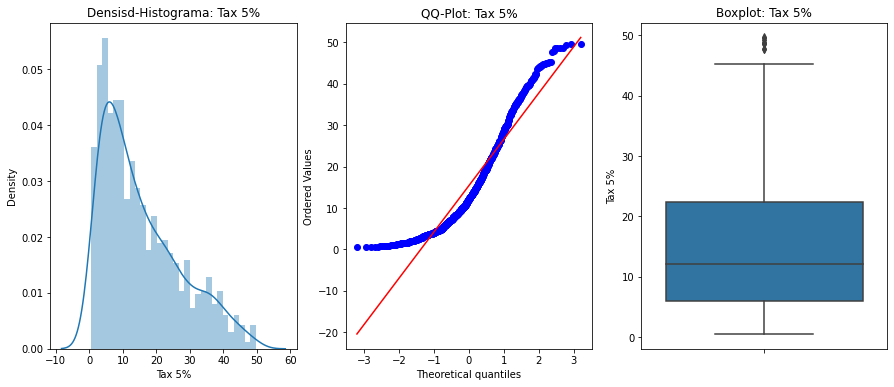

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


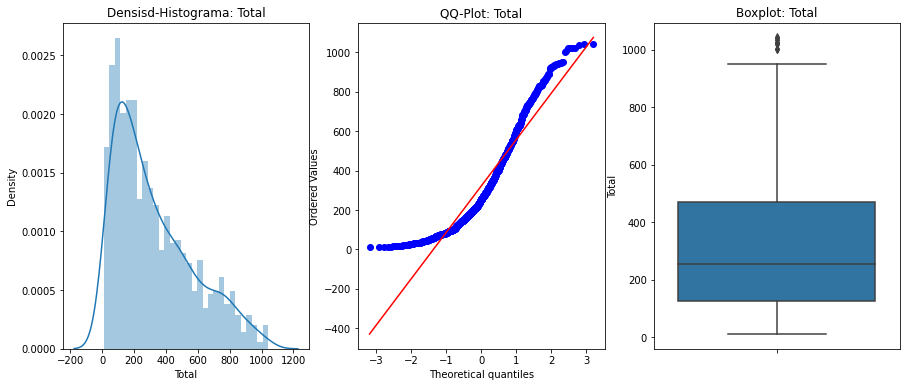

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


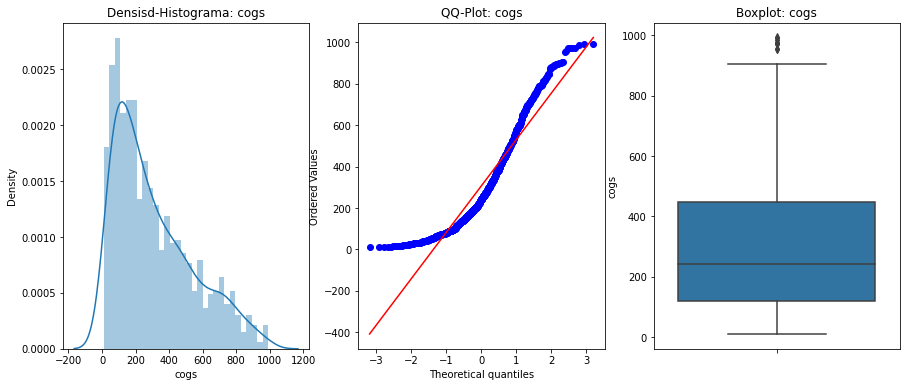

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


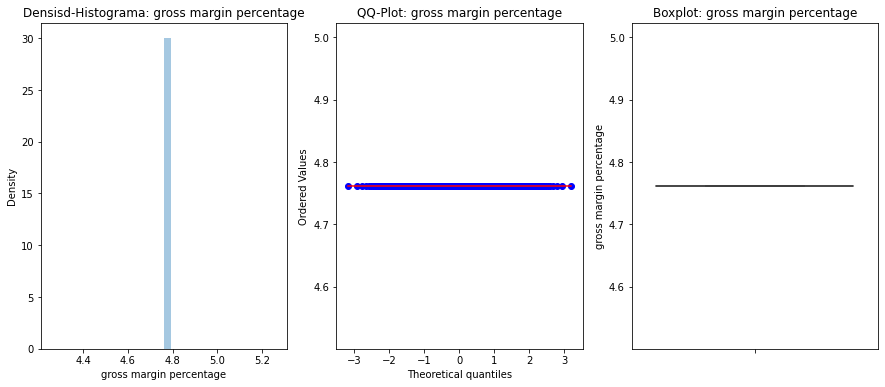

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


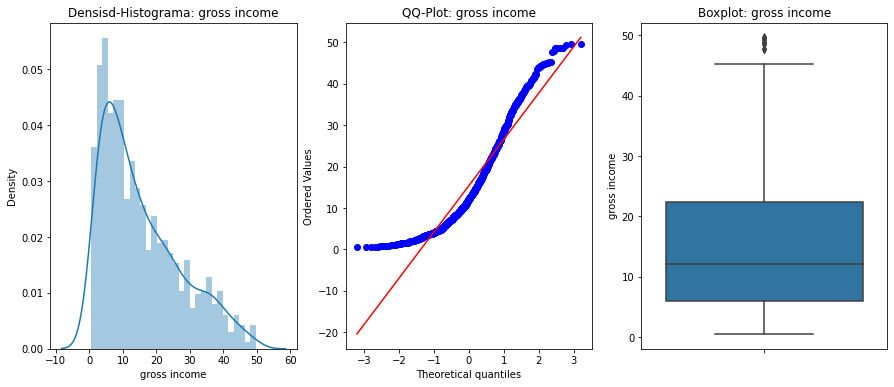

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


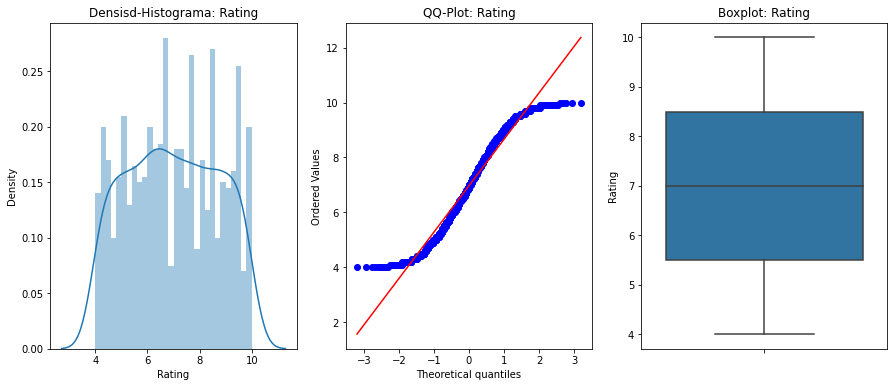

In [10]:
for col in columnas_numericas:
    inspect_outliers(data, col)  

In [11]:
def detect_outliers(df, col1, factor):
    IQR = df[col1].quantile(0.75) - df[col1].quantile(0.25)
    LI = df[col1].quantile(0.25) - (IQR*factor)
    LS = df[col1].quantile(0.75) + (IQR*factor)
    
    return LI, LS

In [12]:
detect_outliers(data,'Unit price', 0.75 )

(-0.9200000000000017, 111.73)

In [13]:
def outlier_treatment(df, col1, factor):
    IQR = df[col1].quantile(0.75) - df[col1].quantile(0.25)
    LI = df[col1].quantile(0.25) - (IQR*factor)
    LS = df[col1].quantile(0.75) + (IQR*factor)
    
    df[col1] = np.where(df[col1] > LS, LS,
                                          np.where(df[col1] < LI, LI, df[col1]))
    return(df)

In [14]:
df = outlier_treatment(data,'Unit price', 0.75)

In [15]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [16]:
df.isnull().values.any()

False

In [17]:
nw_df = df[columnas_numericas]

In [18]:
nw_df

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [19]:
X = nw_df.iloc[:, nw_df.columns != 'Quantity']
y = nw_df.loc[:, 'Quantity']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1234)

In [21]:
std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

X_train.shape, X_test.shape

((800, 7), (200, 7))

In [80]:
def plot_history(mdl):
  hist = pd.DataFrame(mdl.history)
  hist['epoch'] = mdl.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  plt.show()

In [81]:
def validacion_modelo(mdl,X_tst, y_tst):
  test_predictions = mdl.predict(X_tst).flatten()
  plt.scatter(y_tst, test_predictions, color = '#F8C6AD')
  plt.scatter(test_predictions, test_predictions, color = '#EFD022')
  plt.xlabel('Valores de Y')
  plt.ylabel('Y preds')
  plt.xlim([0,plt.xlim()[1]])
  plt.ylim([0,plt.ylim()[1]])
  _ = plt.plot([-100, 100], [-100, 100])

# Arquitectura 1

In [51]:
entradas = X_train.shape[1]
lr = 0.05
batch_sz=100

In [43]:
## Parametros
parametros = {
    'batch_size': [50, 80],
    'optimizador': ['adam', 'rmsprop'],
    'epochs': [20, 25, 30],
}

In [52]:
entradas = X_train.shape[1]
lr = 0.05
batch_sz=100

In [53]:
def modelo(optimizador):
  regressor = Sequential()
  regressor.add(Dense(input_dim=entradas, units=7, kernel_initializer='uniform', activation='relu'))
  regressor.add(Dense(units=14, kernel_initializer='uniform', activation='relu'))
  regressor.add(Dense(units=7, kernel_initializer='uniform', activation='relu'))
  regressor.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
  regressor.compile(optimizer=optimizador, loss='mean_squared_error', metrics=['mean_squared_error']) #regresion.
  return regressor

In [54]:
resultado = KerasRegressor(modelo, validation_split=0.2, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [55]:
grid_search = GridSearchCV(estimator= resultado, 
                         param_grid= parametros, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5)

In [56]:
grid_search.fit(X_train, y_train, verbose = 1)

Epoch 1/20
11/11 [==============================] - 1s 18ms/step - loss: 38.4321 - mean_squared_error: 38.4321 - val_loss: 33.0264 - val_mean_squared_error: 33.0264
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 38.2968 - mean_squared_error: 38.2968 - val_loss: 32.8950 - val_mean_squared_error: 32.8950
Epoch 3/20
11/11 [==============================] - 0s 4ms/step - loss: 38.1394 - mean_squared_error: 38.1394 - val_loss: 32.7440 - val_mean_squared_error: 32.7440
Epoch 4/20
11/11 [==============================] - 0s 4ms/step - loss: 37.9552 - mean_squared_error: 37.9552 - val_loss: 32.5550 - val_mean_squared_error: 32.5550
Epoch 5/20
11/11 [==============================] - 0s 4ms/step - loss: 37.7157 - mean_squared_error: 37.7157 - val_loss: 32.3025 - val_mean_squared_error: 32.3025
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 37.3812 - mean_squared_error: 37.3812 - val_loss: 31.9473 - val_mean_squared_error: 31.9473
Epoch 7/20
11/1

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f328a23ebd0>,
             param_grid={'batch_size': [50, 80], 'epochs': [20, 25, 30],
                         'optimizador': ['adam', 'rmsprop']},
             scoring='neg_root_mean_squared_error')

In [57]:
grid_search.best_params_

{'batch_size': 50, 'epochs': 30, 'optimizador': 'rmsprop'}

In [58]:
regressor1 = Sequential()
regressor1.add(Dense(input_dim=entradas, units=7, kernel_initializer='uniform', activation='relu'))
regressor1.add(Dense(units=14, kernel_initializer='uniform', activation='relu'))
regressor1.add(Dense(units=7, kernel_initializer='uniform', activation='relu'))
regressor1.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
regressor1.compile(optimizer=RMSprop(lr), loss='mean_squared_error', metrics=['mean_squared_error']) #regresion.
modelo1 = regressor1.fit(X_train, y_train, batch_size=50, validation_split=0.2, verbose=1, epochs=30)

Epoch 1/30
13/13 [==============================] - 1s 22ms/step - loss: 14.0616 - mean_squared_error: 14.0616 - val_loss: 2.1895 - val_mean_squared_error: 2.1895
Epoch 2/30
13/13 [==============================] - 0s 6ms/step - loss: 2.6631 - mean_squared_error: 2.6631 - val_loss: 2.7504 - val_mean_squared_error: 2.7504
Epoch 3/30
13/13 [==============================] - 0s 8ms/step - loss: 3.9285 - mean_squared_error: 3.9285 - val_loss: 1.9681 - val_mean_squared_error: 1.9681
Epoch 4/30
13/13 [==============================] - 0s 6ms/step - loss: 3.3307 - mean_squared_error: 3.3307 - val_loss: 3.2875 - val_mean_squared_error: 3.2875
Epoch 5/30
13/13 [==============================] - 0s 8ms/step - loss: 2.6772 - mean_squared_error: 2.6772 - val_loss: 1.1534 - val_mean_squared_error: 1.1534
Epoch 6/30
13/13 [==============================] - 0s 7ms/step - loss: 2.8661 - mean_squared_error: 2.8661 - val_loss: 2.2192 - val_mean_squared_error: 2.2192
Epoch 7/30
13/13 [===================

In [59]:
regressor1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 1.3971 - mean_squared_error: 1.3971


[1.3970599174499512, 1.3970599174499512]

In [ ]:
regressor1.predict(X_test)

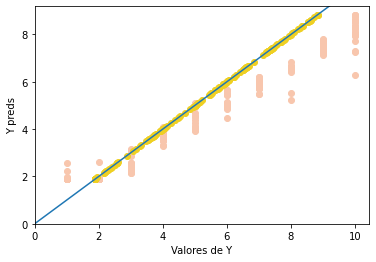

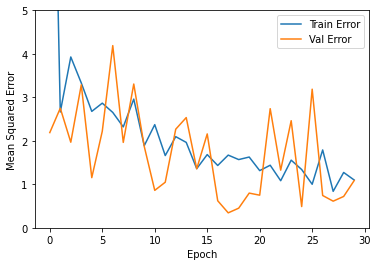

In [82]:
validacion_modelo(regressor1, X_test, y_test)
print()
plot_history(modelo1)

In [83]:
print(mean_squared_error(y_test, regressor1.predict(X_test)))

1.3970598744295994


# Estructura 2

In [98]:
parametros2 = {
    'batch_size': [50, 60],
    'optimizador': ['adam', 'sgd'],
    'epochs': [20, 25],
}

In [93]:
def modelo_v2(optimizador):
  regressor2 = Sequential()
  regressor2.add(Dense(input_dim= entradas, units=4, kernel_initializer='normal', activation='relu'))
  regressor2.add(Dense(units=6, kernel_initializer='normal', activation='relu'))
  regressor2.add(Dense(units=2, kernel_initializer='normal', activation='relu'))
  regressor2.add(Dense(units=1, kernel_initializer='normal', activation='relu'))
  regressor2.compile(optimizer=optimizador, loss='mean_squared_error', metrics=['mean_squared_error'])
  return regressor2

In [95]:
resultado2 = KerasRegressor(modelo_v2, validation_split=0.2, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [99]:
grid_search_mdl_2 = GridSearchCV(estimator= resultado2, 
                         param_grid= parametros2, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5)

In [100]:
grid_search_mdl_2.fit(X_train, y_train, verbose = 1)

Epoch 1/20
11/11 [==============================] - 1s 16ms/step - loss: 38.4272 - mean_squared_error: 38.4272 - val_loss: 33.0220 - val_mean_squared_error: 33.0220
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: 38.2903 - mean_squared_error: 38.2903 - val_loss: 32.8954 - val_mean_squared_error: 32.8954
Epoch 3/20
11/11 [==============================] - 0s 6ms/step - loss: 38.1463 - mean_squared_error: 38.1463 - val_loss: 32.7608 - val_mean_squared_error: 32.7608
Epoch 4/20
11/11 [==============================] - 0s 6ms/step - loss: 37.9901 - mean_squared_error: 37.9901 - val_loss: 32.6153 - val_mean_squared_error: 32.6153
Epoch 5/20
11/11 [==============================] - 0s 4ms/step - loss: 37.8198 - mean_squared_error: 37.8198 - val_loss: 32.4525 - val_mean_squared_error: 32.4525
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 37.6263 - mean_squared_error: 37.6263 - val_loss: 32.2654 - val_mean_squared_error: 32.2654
Epoch 7/20
11/1

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f328e8c32d0>,
             param_grid={'batch_size': [50, 60], 'epochs': [20, 25],
                         'optimizador': ['adam', 'sgd']},
             scoring='neg_root_mean_squared_error')

In [101]:
grid_search_mdl_2.best_params_

{'batch_size': 50, 'epochs': 20, 'optimizador': 'sgd'}

In [105]:
regressor2 = Sequential()
regressor2.add(Dense(input_dim=entradas, units=7, kernel_initializer='uniform', activation='relu'))
regressor2.add(Dense(units=14, kernel_initializer='uniform', activation='relu'))
regressor2.add(Dense(units=7, kernel_initializer='uniform', activation='relu'))
regressor2.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
regressor2.compile(optimizer=SGD(lr), loss='mean_squared_error', metrics=['mean_squared_error']) #regresion.
modelo2 = regressor2.fit(X_train, y_train, batch_size=50, validation_split=0.2, verbose=1, epochs=20)


Epoch 1/20
13/13 [==============================] - 1s 26ms/step - loss: 21.9055 - mean_squared_error: 21.9055 - val_loss: 8.5477 - val_mean_squared_error: 8.5477
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 8.4383 - mean_squared_error: 8.4383 - val_loss: 8.7662 - val_mean_squared_error: 8.7662
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 8.2300 - mean_squared_error: 8.2300 - val_loss: 8.4684 - val_mean_squared_error: 8.4684
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 8.0731 - mean_squared_error: 8.0731 - val_loss: 7.6366 - val_mean_squared_error: 7.6366
Epoch 5/20
13/13 [==============================] - 0s 3ms/step - loss: 5.5018 - mean_squared_error: 5.5018 - val_loss: 4.2947 - val_mean_squared_error: 4.2947
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 3.5288 - mean_squared_error: 3.5288 - val_loss: 1.7819 - val_mean_squared_error: 1.7819
Epoch 7/20
13/13 [===================

In [ ]:
regressor2.predict(X_test)


7/7 [==============================] - 0s 2ms/step - loss: 0.7700 - mean_squared_error: 0.7700




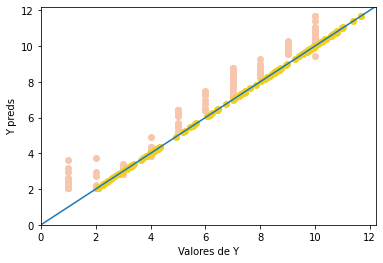

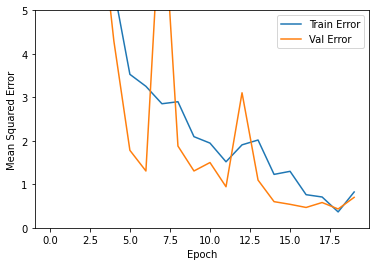


0.7699667324167524


In [107]:
regressor2.evaluate(X_test, y_test)
print()
validacion_modelo(regressor2, X_test, y_test)
print()
plot_history(modelo2)
print()
print(mean_squared_error(y_test, regressor2.predict(X_test)))

# Arquitectura 3

In [108]:
parametros3 = {
    'batch_size': [50, 60,30],
    'optimizador': ['adam', 'sgd', 'nadam', 'adagrad'],
    'epochs': [20, 25, 40],
}

In [109]:
def modelo_v3(optimizador):
  regressor3 = Sequential()
  regressor3.add(Dense(input_dim= entradas, units=4, kernel_initializer='random_normal', activation='relu'))
  regressor3.add(Dense(units=8, kernel_initializer='random_normal', activation='relu'))
  regressor3.add(Dense(units=3, kernel_initializer='random_normal', activation='relu'))
  regressor3.add(Dense(units=1, kernel_initializer='random_normal', activation='relu'))
  regressor3.compile(optimizer=optimizador, loss='mean_squared_error', metrics=['mean_squared_error'])
  return regressor3

In [110]:
resultado3 = KerasRegressor(modelo_v3, validation_split=0.2, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [111]:
grid_search_mdl_3 = GridSearchCV(estimator= resultado3, 
                         param_grid= parametros3, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5)
grid_search_mdl_3.fit(X_train, y_train, verbose = 1)	

Se han truncado las últimas 5000 líneas del flujo de salida.
3/3 [==============================] - 0s 4ms/step
Epoch 1/40
9/9 [==============================] - 1s 32ms/step - loss: 39.6609 - mean_squared_error: 39.6609 - val_loss: 33.0426 - val_mean_squared_error: 33.0426
Epoch 2/40
9/9 [==============================] - 0s 9ms/step - loss: 39.5475 - mean_squared_error: 39.5475 - val_loss: 32.9378 - val_mean_squared_error: 32.9378
Epoch 3/40
9/9 [==============================] - 0s 8ms/step - loss: 39.4257 - mean_squared_error: 39.4257 - val_loss: 32.8234 - val_mean_squared_error: 32.8234
Epoch 4/40
9/9 [==============================] - 0s 8ms/step - loss: 39.2900 - mean_squared_error: 39.2900 - val_loss: 32.6948 - val_mean_squared_error: 32.6948
Epoch 5/40
9/9 [==============================] - 0s 8ms/step - loss: 39.1340 - mean_squared_error: 39.1340 - val_loss: 32.5458 - val_mean_squared_error: 32.5458
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 38.9529

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3282db5b50>,
             param_grid={'batch_size': [50, 60, 30], 'epochs': [20, 25, 40],
                         'optimizador': ['adam', 'sgd', 'nadam', 'adagrad']},
             scoring='neg_root_mean_squared_error')

In [112]:
grid_search_mdl_3.best_params_


{'batch_size': 30, 'epochs': 40, 'optimizador': 'sgd'}

In [113]:
regressor3 = Sequential()
regressor3.add(Dense(input_dim=entradas, units=7, kernel_initializer='random_normal', activation='relu'))
regressor3.add(Dense(units=14, kernel_initializer='random_normal', activation='relu'))
regressor3.add(Dense(units=7, kernel_initializer='random_normal', activation='relu'))
regressor3.add(Dense(units=1, kernel_initializer='random_normal', activation='relu'))
regressor3.compile(optimizer=SGD(lr), loss='mean_squared_error', metrics=['mean_squared_error']) #regresion.
modelo3 = regressor3.fit(X_train, y_train, batch_size=30, validation_split=0.2, verbose=1, epochs=40)


Epoch 1/40
22/22 [==============================] - 1s 8ms/step - loss: 14.8834 - mean_squared_error: 14.8834 - val_loss: 9.1219 - val_mean_squared_error: 9.1219
Epoch 2/40
22/22 [==============================] - 0s 4ms/step - loss: 5.9591 - mean_squared_error: 5.9591 - val_loss: 3.6893 - val_mean_squared_error: 3.6893
Epoch 3/40
22/22 [==============================] - 0s 3ms/step - loss: 3.8803 - mean_squared_error: 3.8803 - val_loss: 3.6914 - val_mean_squared_error: 3.6914
Epoch 4/40
22/22 [==============================] - 0s 4ms/step - loss: 2.0259 - mean_squared_error: 2.0259 - val_loss: 0.9592 - val_mean_squared_error: 0.9592
Epoch 5/40
22/22 [==============================] - 0s 3ms/step - loss: 2.2393 - mean_squared_error: 2.2393 - val_loss: 2.0002 - val_mean_squared_error: 2.0002
Epoch 6/40
22/22 [==============================] - 0s 4ms/step - loss: 1.1416 - mean_squared_error: 1.1416 - val_loss: 0.6896 - val_mean_squared_error: 0.6896
Epoch 7/40
22/22 [====================

In [ ]:
regressor3.predict(X_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3419 - mean_squared_error: 0.3419




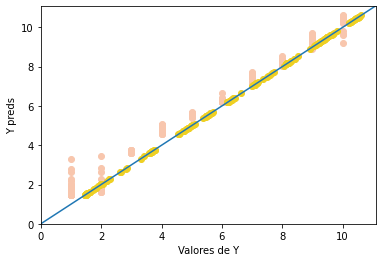

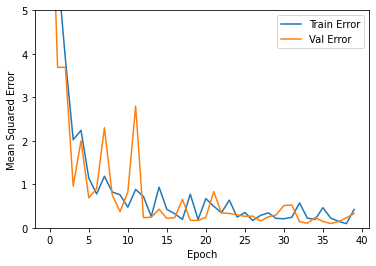


0.3419453605210243


In [115]:
regressor3.evaluate(X_test, y_test)
print()
validacion_modelo(regressor3, X_test, y_test)
print()
plot_history(modelo3)
print()
print(mean_squared_error(y_test, regressor3.predict(X_test)))

# Estructura 4

In [116]:
parametros4 = {
    'batch_size': [70, 90],
    'optimizador': ['adam', 'nadam', 'adagrad'],
    'epochs': [20, 40],
}


In [117]:
def modelo_v4(optimizador):
  regressor4 = Sequential()
  regressor4.add(Dense(input_dim= entradas, units=4, kernel_initializer='uniform', activation='relu'))
  regressor4.add(Dense(units=12, kernel_initializer='uniform', activation='relu'))
  regressor4.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
  regressor4.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
  regressor4.compile(optimizer=optimizador, loss='mean_squared_error', metrics=['mean_squared_error'])
  return regressor4

In [118]:
resultado4 = KerasRegressor(modelo_v4, validation_split=0.2, verbose=1)
grid_search_mdl_4 = GridSearchCV(estimator= resultado4, 
                         param_grid= parametros4, 
                         scoring='neg_root_mean_squared_error', 
                         cv=5)
grid_search_mdl_4.fit(X_train, y_train, verbose = 1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


8/8 [==============================] - 1s 28ms/step - loss: 38.4447 - mean_squared_error: 38.4447 - val_loss: 33.0529 - val_mean_squared_error: 33.0529
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 38.3433 - mean_squared_error: 38.3433 - val_loss: 32.9548 - val_mean_squared_error: 32.9548
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 38.2279 - mean_squared_error: 38.2279 - val_loss: 32.8427 - val_mean_squared_error: 32.8427
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: 38.0928 - mean_squared_error: 38.0928 - val_loss: 32.7099 - val_mean_squared_error: 32.7099
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 37.9321 - mean_squared_error: 37.9321 - val_loss: 32.5440 - val_mean_squared_error: 32.5440
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 37.7283 - mean_squared_error: 37.7283 - val_loss: 32.3313 - val_mean_squared_error: 32.3313
Epoch 7/20
8/8 [======================

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f328a675990>,
             param_grid={'batch_size': [70, 90], 'epochs': [20, 40],
                         'optimizador': ['adam', 'nadam', 'adagrad']},
             scoring='neg_root_mean_squared_error')

In [119]:
grid_search_mdl_4.best_params_

{'batch_size': 70, 'epochs': 40, 'optimizador': 'nadam'}

In [120]:
regressor4 = Sequential()
regressor4.add(Dense(input_dim=entradas, units=7, kernel_initializer='uniform', activation='relu'))
regressor4.add(Dense(units=14, kernel_initializer='uniform', activation='relu'))
regressor4.add(Dense(units=7, kernel_initializer='uniform', activation='relu'))
regressor4.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
regressor4.compile(optimizer=Nadam(lr), loss='mean_squared_error', metrics=['mean_squared_error']) #regresion.
modelo4 = regressor4.fit(X_train, y_train, batch_size=70, validation_split=0.2, verbose=1, epochs=40)

Epoch 1/40
10/10 [==============================] - 1s 22ms/step - loss: 38.0162 - mean_squared_error: 38.0162 - val_loss: 17.3981 - val_mean_squared_error: 17.3981
Epoch 2/40
10/10 [==============================] - 0s 7ms/step - loss: 9.4309 - mean_squared_error: 9.4309 - val_loss: 3.7206 - val_mean_squared_error: 3.7206
Epoch 3/40
10/10 [==============================] - 0s 6ms/step - loss: 2.7676 - mean_squared_error: 2.7676 - val_loss: 5.8686 - val_mean_squared_error: 5.8686
Epoch 4/40
10/10 [==============================] - 0s 6ms/step - loss: 2.5509 - mean_squared_error: 2.5509 - val_loss: 2.6221 - val_mean_squared_error: 2.6221
Epoch 5/40
10/10 [==============================] - 0s 5ms/step - loss: 1.5982 - mean_squared_error: 1.5982 - val_loss: 1.6229 - val_mean_squared_error: 1.6229
Epoch 6/40
10/10 [==============================] - 0s 7ms/step - loss: 1.5083 - mean_squared_error: 1.5083 - val_loss: 1.3768 - val_mean_squared_error: 1.3768
Epoch 7/40
10/10 [=================

In [ ]:
regressor4.predict(X_test)

7/7 [==============================] - 0s 2ms/step - loss: 4.3655 - mean_squared_error: 4.3655




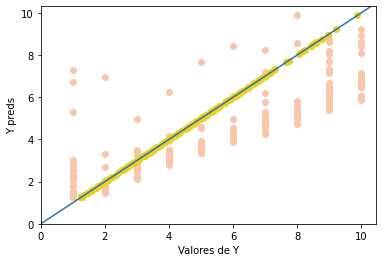

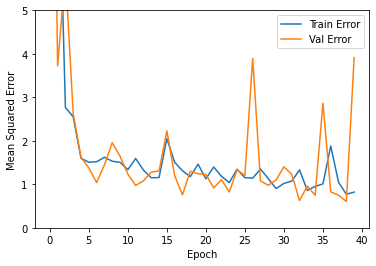


4.365527745560834


In [122]:
regressor4.evaluate(X_test, y_test)
print()
validacion_modelo(regressor4, X_test, y_test)
print()
plot_history(modelo4)
print()
print(mean_squared_error(y_test, regressor4.predict(X_test)))

# Conclusión

Se procedió a crear las 4 estructuras con los parámetros 'adam', 'sgd', 'nadam', 'adagrad',  con epochs entre 20 y 100,  una vez ejecutado las 4 estructuras, se recomienda utilizar la estructura número 2, esta contiene los parámetros siguientes:
{'batch_size': 50, 'epochs': 20, 'optimizador': 'sgd'}
